In [1]:
## More granular exploratory data analysis using only the training dataset
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## import the training dataset
housing = pd.read_csv("../data/interim/housing_train_set.csv")

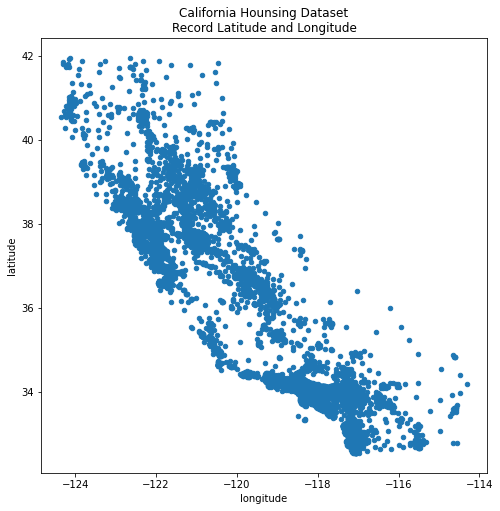

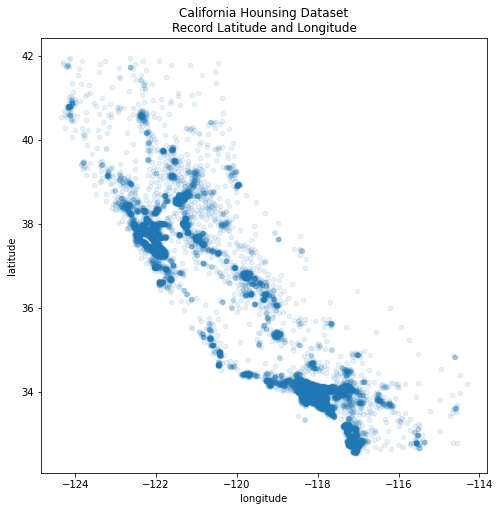

In [7]:
## Scatter plot of the longitude and latitude positions for each record
housing.plot(kind='scatter',title='California Hounsing Dataset\nRecord Latitude and Longitude',
             x='longitude', y='latitude', figsize=(8,8))
plt.show()

## The same scatter plot, with transparancy set to also show record density.
housing.plot(kind='scatter',title='California Hounsing Dataset\nRecord Latitude and Longitude',
             x='longitude', y='latitude', figsize=(8,8), alpha=0.1)
plt.show()

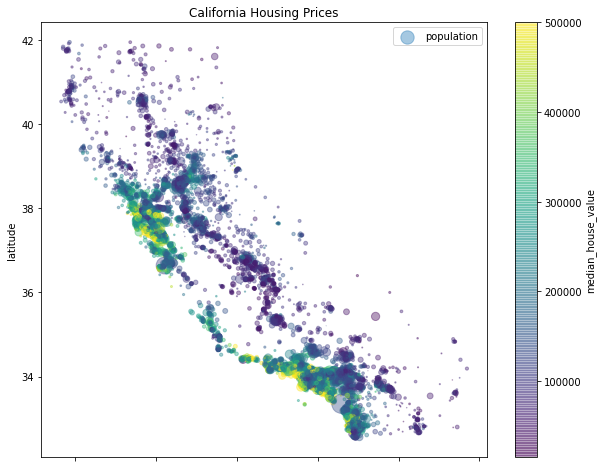

In [23]:
## Add color to the plot to show house price
housing.plot(kind='scatter', title='California Housing Prices',
             x='longitude', y='latitude', alpha=0.4, s=housing.population/100,
             label='population', figsize=(10,8), c='median_house_value',
             cmap=plt.get_cmap('viridis'), colorbar=True,)
plt.show()

In [38]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [34]:
## Compute the Pearson's correlation coefficient for each attribute pair
corr_matrix = housing.corr()
## Show the full correlation matrix
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


In [35]:
## Show the correlation values for one attribute
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

In [30]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

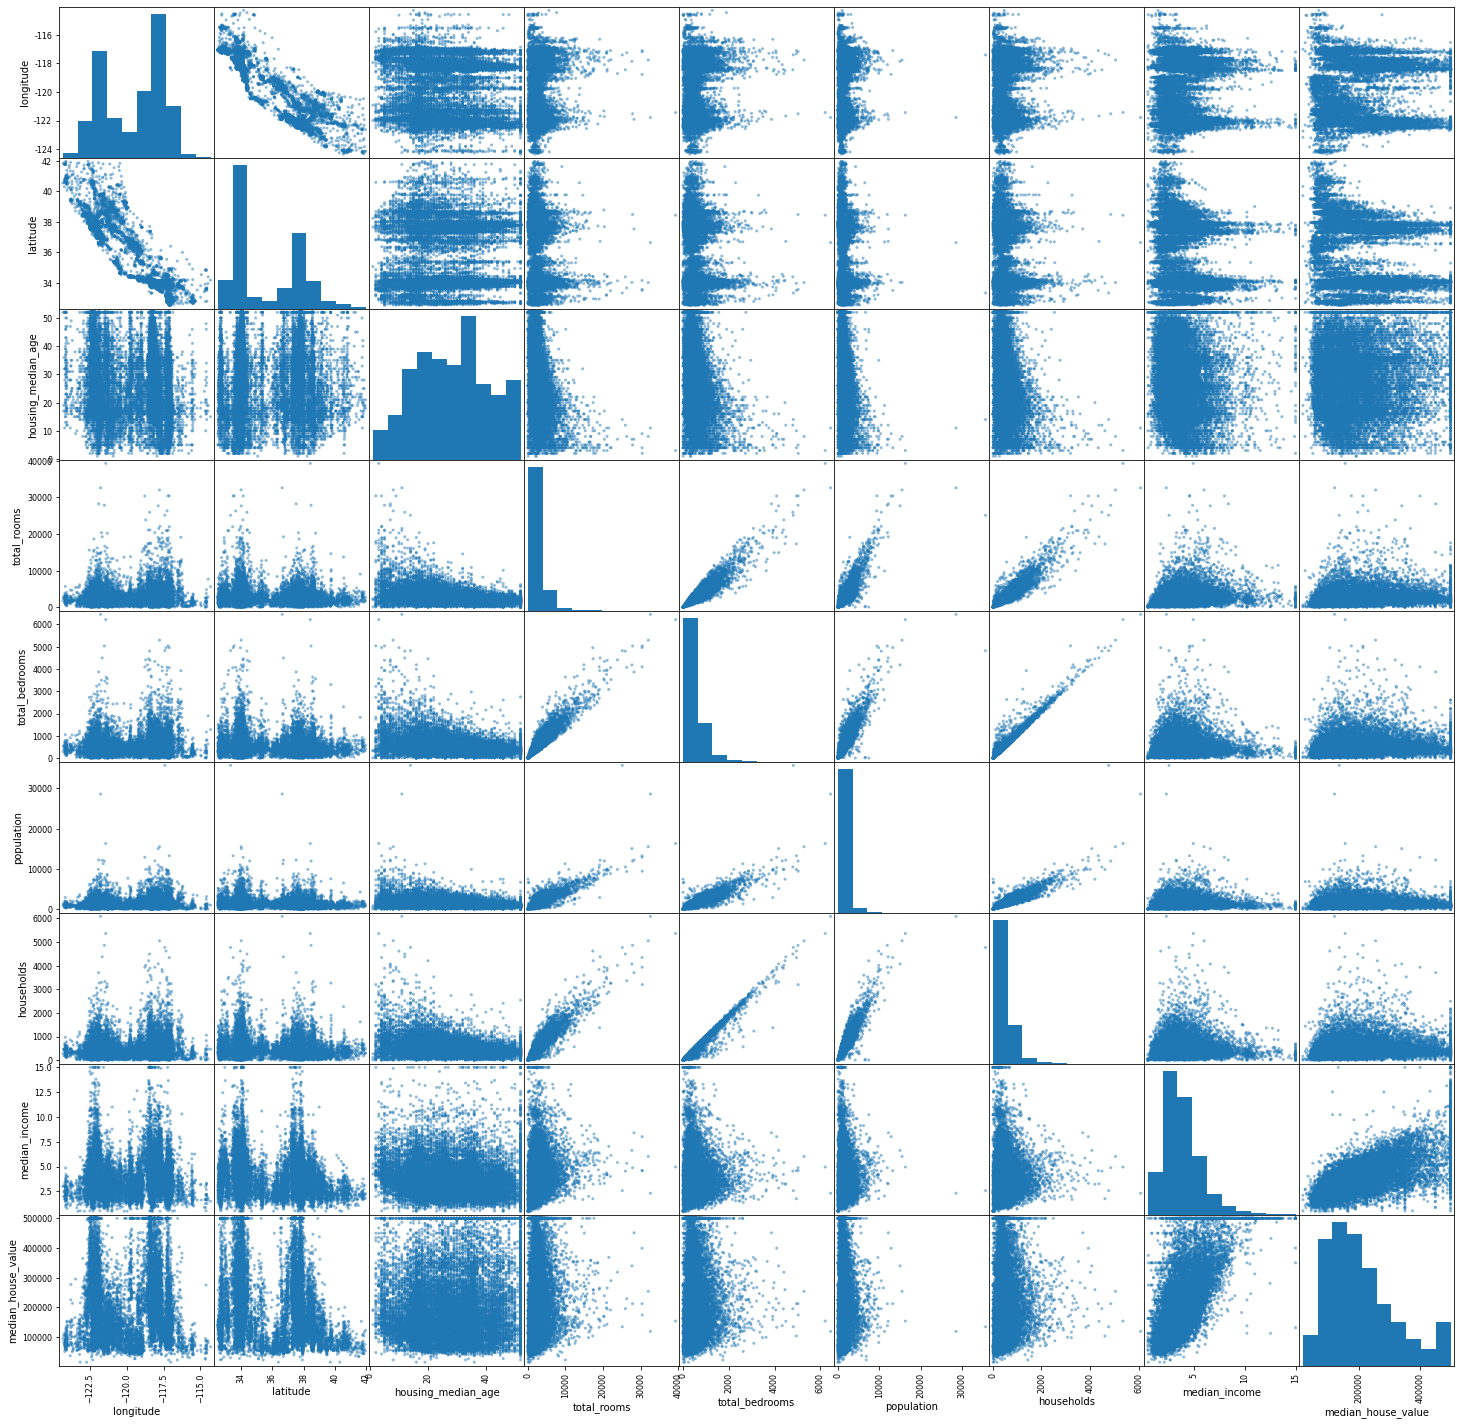

In [37]:
cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
pd.plotting.scatter_matrix(housing, figsize=(25,25))
plt.show()

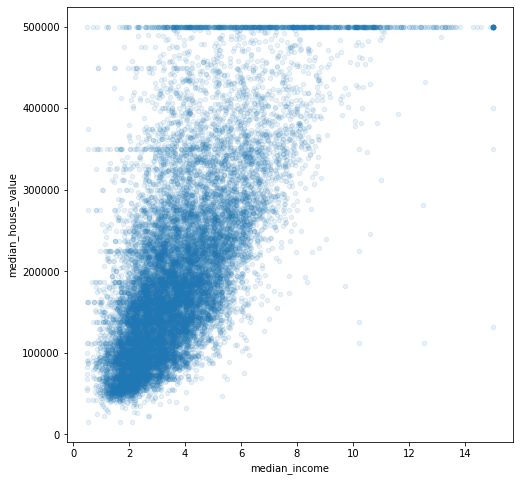

In [42]:
housing.plot(kind='scatter',x='median_income', y='median_house_value', alpha=0.1, figsize=(8,8))
plt.show()

In [46]:
## Create some combination variables
housing['rooms_per_household'] = housing.total_rooms/housing.households
housing['bedrooms_per_room'] = housing.total_bedrooms / housing.households
housing['population_per_household'] = housing.population/housing.households

In [49]:
corr_matrix = housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
bedrooms_per_room          -0.051351
latitude                   -0.142983
Name: median_house_value, dtype: float64